Link do notatnika: https://colab.research.google.com/drive/1HT9GvmSHVGwwpjDW-wMDJOOQPcbEBK_X?usp=sharing

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.decomposition import PCA
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

* Boosting – np. AdaBoost https://scikitlearn.org/stable/modules/ensemble.html#adaboost
https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
* RandomForest: https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Bagging Classifier:
https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

2. Algorytm bagging: uruchomienie, wstępna konfiguracja, sprawdzenie skuteczności
dla 3 zbiorów. Sugerowane badane parametry:
- liczba klasyfikatorów
- liczba próbek (samples)
- liczba atrybutów (cech, features)
- bootstrap
3. Algorytm boosting: uruchomienie, wstępna konfiguracja, sprawdzenie skuteczności
dla 3 zbiorów. Sugerowane badane parametry:
- liczba klasyfikatorów
- współczynnik uczenia (learning_rate)
4. Algorytm RandomForest: uruchomienie, wstępna konfiguracja, sprawdzenie
skuteczności dla 3 zbiorów. Sugerowane badane parametry:
- liczba próbek (samples)
- liczba atrybutów (cech, features)
- liczba drzew
- głębokość drzewa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/Iris.csv"
wine_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/wine.data"
glass_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/glass.data"
seeds_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/seeds_dataset.txt"

In [ ]:
def metrix(y_test, y_pred):
  acc= accuracy_score(y_test, y_pred)
  f1_s = f1_score(y_test, y_pred, average='macro')

  print(f'Accuracy: {acc}\nf1 score: {f1_s}')

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True)

param_grid_ada_boost = {
    "n_estimators": [10, 30, 50, 70, 100, 150, 200],
    "learning_rate": [0.1, 0.5, 0.7, 1],  # Wyższe wartości learning_rate zwiększają wpływ każdego klasyfikatora bazowego, ale mogą również spowodować przetrenowanie
}

param_grid_bagging = {
    "n_estimators": [10, 30, 50, 70, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    "bootstrap": [False, True],  # czy losowe próbkowanie jest wykonywane z powtórzeniami
}

param_grid_rand_forest = {
    'n_estimators': [100, 150, 200, 250, 300],  # liczba drzew
    'max_depth': [None, 5, 10, 15],  # głębokość drzewa
    'max_features': ['sqrt', 'log2', None],  # liczba atrybutów (cech)
    'min_samples_split': [2, 5, 10],  # minimalna liczba próbek do podziału węzła
    'min_samples_leaf': [1, 2, 4]  # minimalna liczba próbek wymagana w liściu
}

# **Podsumowanie:**

* Bagging (Bootstrap Aggregating): polega na tworzeniu wielu niezależnych klasyfikatorów na podstawie próbek danych, które są losowo wybierane ze zwracaniem. Każdy klasyfikator jest trenowany na innej podpróbce danych, a ostateczna decyzja jest podejmowana na podstawie głosowania lub uśredniania wyników pojedynczych klasyfikatorów. Bagging ma na celu **zmniejszenie wariancji** i **poprawę ogólnej wydajności** klasyfikatora.


* Boosting: polega na tworzeniu sekwencji słabych klasyfikatorów, które są ważone na podstawie wyników poprzednich klasyfikatorów. Klasyfikatory są trenowane na kolejnych podpróbkach danych, z większym naciskiem na próbki, które były źle sklasyfikowane przez poprzednie klasyfikatory. Finalna decyzja jest podejmowana przez kombinację ważoną wyników wszystkich klasyfikatorów. Boosting jest skuteczną metodą poprawy precyzji klasyfikacji.

* Randomforest:  tworzy zbiór drzew decyzyjnych. Każde drzewo jest trenowane na losowej podpróbce danych, a podczas tworzenia drzewa, dla każdego węzła, losowo wybierany jest podzbiór atrybutów. Ostateczna decyzja klasyfikacji jest podejmowana przez głosowanie większościowe wśród drzew składających się na las. Random Forest jest efektywnym algorytmem, który radzi sobie zarówno z danymi liczbowymi, jak i kategorycznymi, i ma wbudowaną metodę oceny ważności cech.

*Podstawowym klassyfikatorem każdego z poniżej przedstawionych są drzewa decyzyjne.*


---



---


***Glass***:
- Boosting `{'learning_rate': 0.5, 'n_estimators': 100}`:

  `f1 score: 0.513`
- Bagging `{'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}`:

  `f1 score: 0.804`
- Random forest `{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}`

  `f1 score: 0.778`

***Wine***:
- Boosting `{'learning_rate': 1, 'n_estimators': 10}`:

  `f1 score: 0.9201`
- Bagging `{'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}`

  `f1 score: 1`
- Random forest (`defaults`)

  `f1 score: 1`

***Seeds***:
- Boosting `{'learning_rate': 0.7, 'n_estimators': 150}`:

  `f1 score: 0.9521`
- Bagging `{'bootstrap': False, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 70}`

  `f1 score: 0.9761` as for defaults
- Random forest `{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}`

  `f1 score: 1`



---


# Iris

In [ ]:
iris = pd.read_csv(iris_path)
iris = iris.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
fig = px.scatter(iris, x = "SepalLengthCm", y = "SepalWidthCm", color = "Species",
                 width=700, height=400, title="Zależność długość i szerokości kielicha")
fig.show()

In [ ]:
pd.value_counts(iris['Species'])  #Sprawdzenie rozkładu klas

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
y = iris.pop('Species')
X = iris

In [ ]:
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
features = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)

## AdaBoost

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


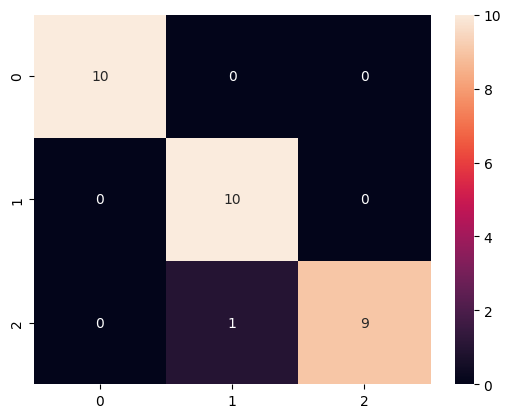

In [ ]:
# default params
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_ada_boost['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  abc = AdaBoostClassifier(n_estimators=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing learning rates

learning_rates = param_grid_ada_boost['learning_rate']
results_n = []
scr = []
for c in learning_rates:
  abc = AdaBoostClassifier(learning_rate=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'learning_rate'])
fig = px.box(scored_df, x = 'learning_rate', y="score", title='learning_rate scores')
fig.show()

Najlepsze wartości hiperparametrów: {'learning_rate': 1, 'n_estimators': 100}
z uzyskanym wynikiem: 0.9498692810457516
Wyniki na zbiorze testowym:

Accuracy: 0.9
f1 score: 0.8976982097186701


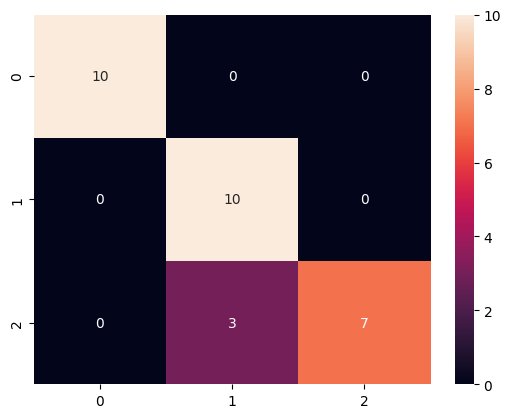

In [ ]:
# GridSearch

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid_ada_boost, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów: {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## Bagging

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


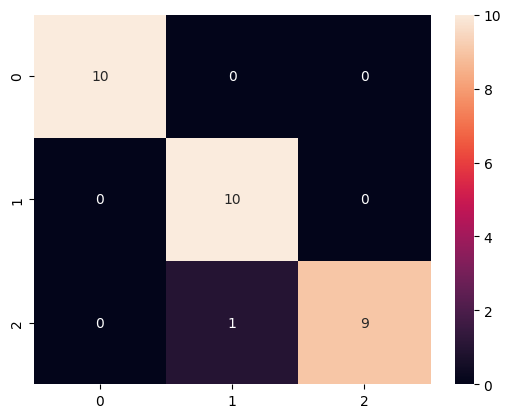

In [ ]:
# default params
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_bagging['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  bag = BaggingClassifier(n_estimators=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing max_samples

max_samples = param_grid_bagging['max_samples']
results_n = []
scr = []
for c in max_samples:
  bag = BaggingClassifier(max_samples=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_samples'])
fig = px.box(scored_df, x = 'max_samples', y="score", title='max_samples scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_bagging['max_features']
results_n = []
scr = []
for c in max_features:
  bag = BaggingClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing bootstrap

bootstrap = param_grid_bagging['bootstrap']
results_n = []
scr = []
for c in bootstrap:
  bag = BaggingClassifier(bootstrap=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'bootstrap'])
fig = px.box(scored_df, x = 'bootstrap', y="score", title='bootstrap scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
z uzyskanym wynikiem: 0.9749019607843138
Wyniki na zbiorze testowym:

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


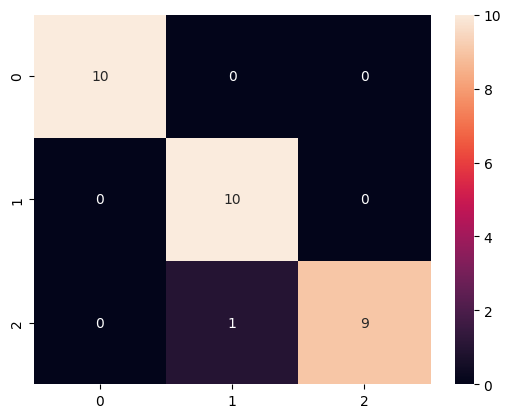

In [ ]:
# GridSearch

grid_search = GridSearchCV(BaggingClassifier(), param_grid_bagging, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## RandomForest

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


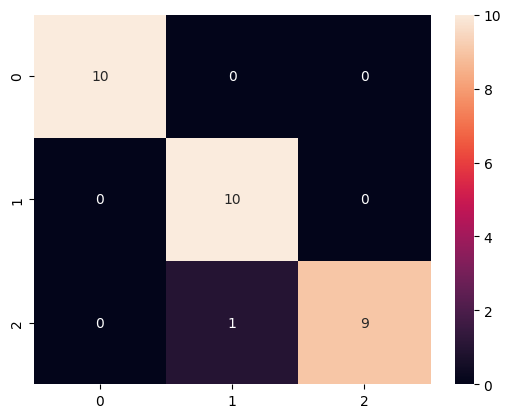

In [ ]:
# default params
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_rand_forest['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  forest = RandomForestClassifier(n_estimators=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimators scores')
fig.show()

In [ ]:
# testing max_depth

max_depth = param_grid_rand_forest['max_depth']
results_n = []
scr = []
for c in max_depth:
  forest = RandomForestClassifier(max_depth=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, str(c)])

scored_df = pd.DataFrame(scr, columns=['score', 'max_depth'])
fig = px.box(scored_df, x = 'max_depth', y="score", title='max_depth scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_rand_forest['max_features']
results_n = []
scr = []
for c in max_features:
  forest = RandomForestClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing min_samples_split

min_samples_split = param_grid_rand_forest['min_samples_split']
results_n = []
scr = []
for c in min_samples_split:
  forest = RandomForestClassifier(min_samples_split=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_split'])
fig = px.box(scored_df, x = 'min_samples_split', y="score", title='min_samples_split scores')
fig.show()

In [ ]:
# testing min_samples_leaf

min_samples_leaf = param_grid_rand_forest['min_samples_leaf']
results_n = []
scr = []
for c in min_samples_leaf:
  forest = RandomForestClassifier(min_samples_leaf=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_leaf'])
fig = px.box(scored_df, x = 'min_samples_leaf', y="score", title='min_samples_leaf scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
z uzyskanym wynikiem: 0.9749019607843138
Wyniki na zbiorze testowym:

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


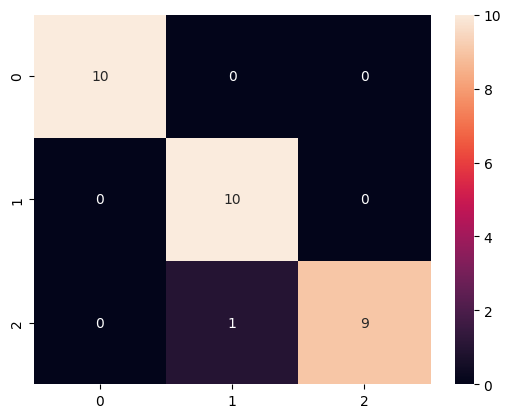

In [ ]:
# GridSearch

grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rand_forest, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

# Glass

In [ ]:
glass = pd.read_csv(glass_path, header=None)
glass.columns = ['Id' ,'RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type']
glass = glass.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
pd.value_counts(glass['Glass_type'])  #Sprawdzenie rozkładu klas

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

In [ ]:
y = glass.pop('Glass_type')
X = glass

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)

## AdaBoost

Accuracy: 0.5813953488372093
f1 score: 0.45011788977306216


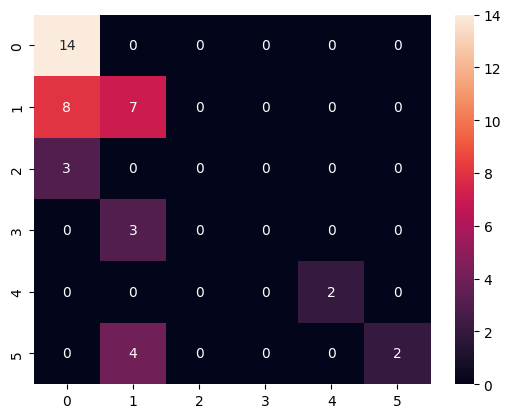

In [ ]:
# default params
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_ada_boost['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  abc = AdaBoostClassifier(n_estimators=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing learning rates

learning_rates = param_grid_ada_boost['learning_rate']
results_n = []
scr = []
for c in learning_rates:
  abc = AdaBoostClassifier(learning_rate=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'learning_rate'])
fig = px.box(scored_df, x = 'learning_rate', y="score", title='learning_rate scores')
fig.show()

Najlepsze wartości hiperparametrów: {'learning_rate': 0.5, 'n_estimators': 100}
z uzyskanym wynikiem: 0.5135297356964024
Wyniki na zbiorze testowym:

Accuracy: 0.6976744186046512
f1 score: 0.5130906768837803


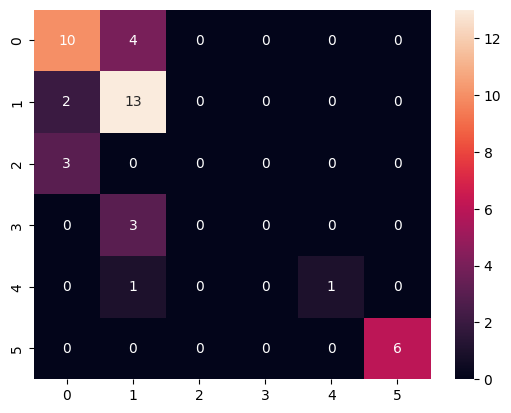

In [ ]:
# GridSearch

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid_ada_boost, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów: {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## Bagging

Accuracy: 0.7441860465116279
f1 score: 0.7434343434343434


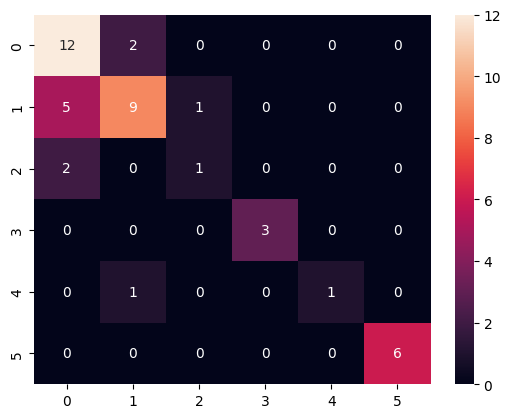

In [ ]:
# default params
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_bagging['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  bag = BaggingClassifier(n_estimators=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing max_samples

max_samples = param_grid_bagging['max_samples']
results_n = []
scr = []
for c in max_samples:
  bag = BaggingClassifier(max_samples=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_samples'])
fig = px.box(scored_df, x = 'max_samples', y="score", title='max_samples scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_bagging['max_features']
results_n = []
scr = []
for c in max_features:
  bag = BaggingClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing bootstrap

bootstrap = param_grid_bagging['bootstrap']
results_n = []
scr = []
for c in bootstrap:
  bag = BaggingClassifier(bootstrap=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'bootstrap'])
fig = px.box(scored_df, x = 'bootstrap', y="score", title='bootstrap scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'bootstrap': False, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
z uzyskanym wynikiem: 0.7586606790954616
Wyniki na zbiorze testowym:

Accuracy: 0.7674418604651163
f1 score: 0.768037518037518


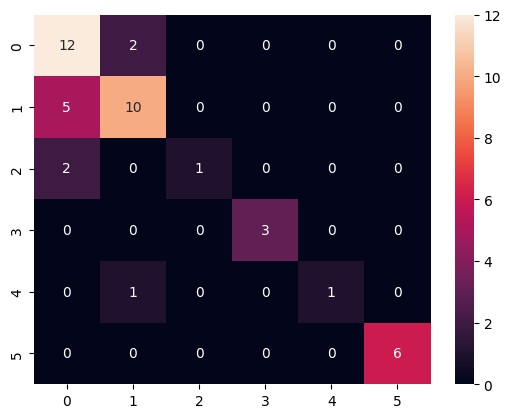

In [ ]:
# GridSearch

grid_search = GridSearchCV(BaggingClassifier(), param_grid_bagging, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## RandomForest

Accuracy: 0.7674418604651163
f1 score: 0.7416666666666666


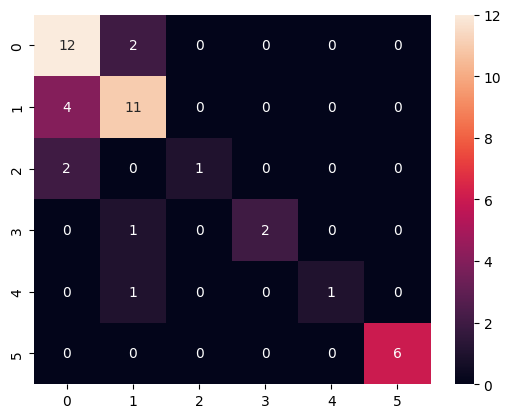

In [ ]:
# default params
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_rand_forest['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  forest = RandomForestClassifier(n_estimators=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimators scores')
fig.show()

In [ ]:
# testing max_depth

max_depth = param_grid_rand_forest['max_depth']
results_n = []
scr = []
for c in max_depth:
  forest = RandomForestClassifier(max_depth=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, str(c)])

scored_df = pd.DataFrame(scr, columns=['score', 'max_depth'])
fig = px.box(scored_df, x = 'max_depth', y="score", title='max_depth scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_rand_forest['max_features']
results_n = []
scr = []
for c in max_features:
  forest = RandomForestClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing min_samples_split

min_samples_split = param_grid_rand_forest['min_samples_split']
results_n = []
scr = []
for c in min_samples_split:
  forest = RandomForestClassifier(min_samples_split=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_split'])
fig = px.box(scored_df, x = 'min_samples_split', y="score", title='min_samples_split scores')
fig.show()

In [ ]:
# testing min_samples_leaf

min_samples_leaf = param_grid_rand_forest['min_samples_leaf']
results_n = []
scr = []
for c in min_samples_leaf:
  forest = RandomForestClassifier(min_samples_leaf=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_leaf'])
fig = px.box(scored_df, x = 'min_samples_leaf', y="score", title='min_samples_leaf scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
z uzyskanym wynikiem: 0.7865518807547792
Wyniki na zbiorze testowym:

Accuracy: 0.7906976744186046
f1 score: 0.7665801507848226


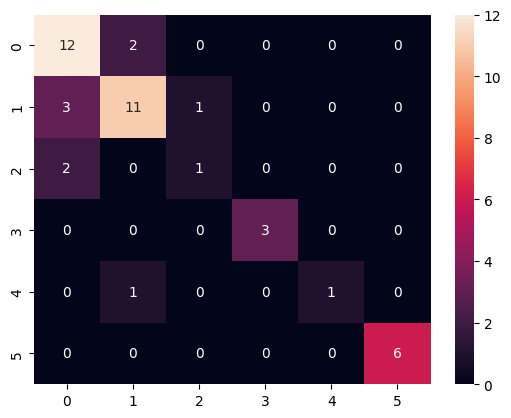

In [ ]:
# GridSearch

grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rand_forest, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

# Wine

In [ ]:
wine = pd.read_csv(wine_path, header=None)
wine.columns = ['Quality', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity' ,
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
pd.value_counts(wine['Quality'])  #Sprawdzenie rozkładu klas

2    71
1    59
3    48
Name: Quality, dtype: int64

In [ ]:
y = wine.pop('Quality')
X = wine

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)

## AdaBoost

Accuracy: 0.9166666666666666
f1 score: 0.9201956039524098


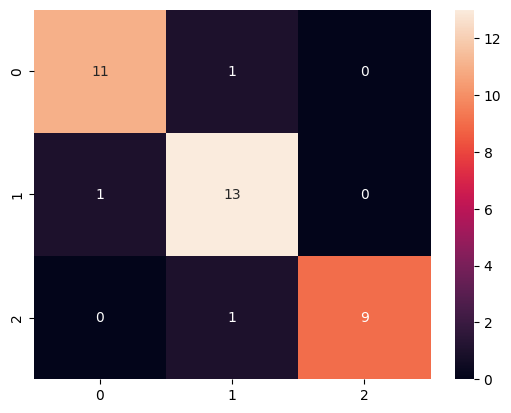

In [ ]:
# default params
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_ada_boost['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  abc = AdaBoostClassifier(n_estimators=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing learning rates

learning_rates = param_grid_ada_boost['learning_rate']
results_n = []
scr = []
for c in learning_rates:
  abc = AdaBoostClassifier(learning_rate=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'learning_rate'])
fig = px.box(scored_df, x = 'learning_rate', y="score", title='learning_rate scores')
fig.show()

Najlepsze wartości hiperparametrów: {'learning_rate': 1, 'n_estimators': 10}
z uzyskanym wynikiem: 0.9509951259311873
Wyniki na zbiorze testowym:

Accuracy: 0.9166666666666666
f1 score: 0.9201956039524098


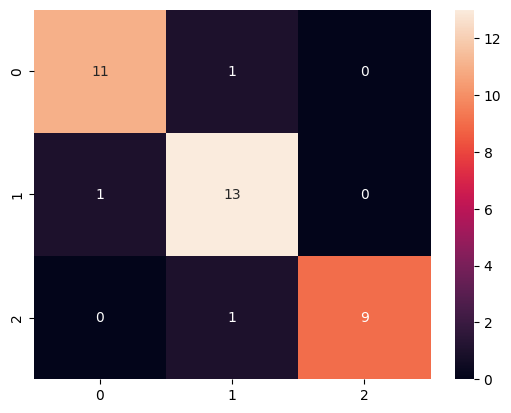

In [ ]:
# GridSearch

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid_ada_boost, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów: {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## Bagging

Accuracy: 0.9722222222222222
f1 score: 0.9740129935032483


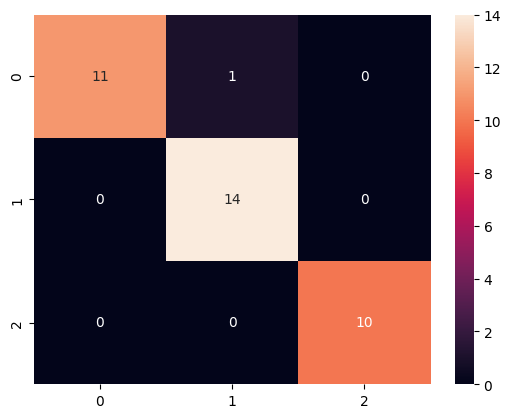

In [ ]:
# default params
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_bagging['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  bag = BaggingClassifier(n_estimators=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing max_samples

max_samples = param_grid_bagging['max_samples']
results_n = []
scr = []
for c in max_samples:
  bag = BaggingClassifier(max_samples=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_samples'])
fig = px.box(scored_df, x = 'max_samples', y="score", title='max_samples scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_bagging['max_features']
results_n = []
scr = []
for c in max_features:
  bag = BaggingClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing bootstrap

bootstrap = param_grid_bagging['bootstrap']
results_n = []
scr = []
for c in bootstrap:
  bag = BaggingClassifier(bootstrap=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'bootstrap'])
fig = px.box(scored_df, x = 'bootstrap', y="score", title='bootstrap scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
z uzyskanym wynikiem: 0.9865546218487395
Wyniki na zbiorze testowym:

Accuracy: 1.0
f1 score: 1.0


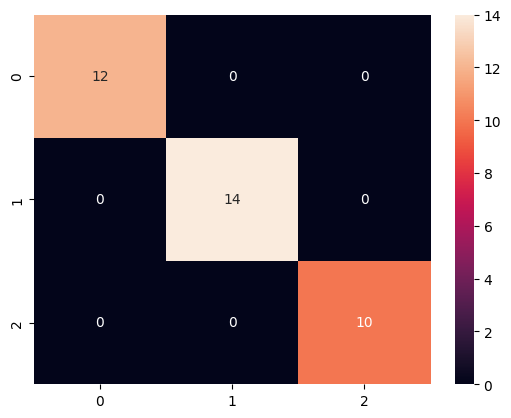

In [ ]:
# GridSearch

grid_search = GridSearchCV(BaggingClassifier(), param_grid_bagging, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## RandomForest

Accuracy: 1.0
f1 score: 1.0


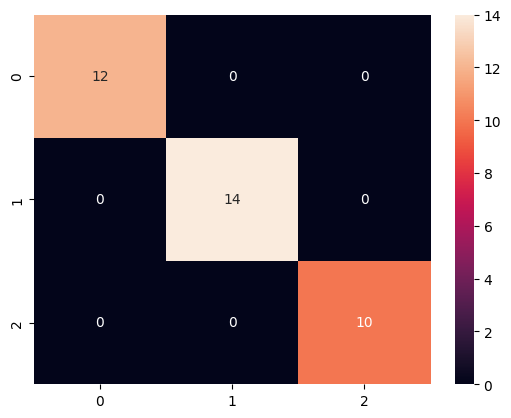

In [ ]:
# default params
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_rand_forest['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  forest = RandomForestClassifier(n_estimators=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimators scores')
fig.show()

In [ ]:
# testing max_depth

max_depth = param_grid_rand_forest['max_depth']
results_n = []
scr = []
for c in max_depth:
  forest = RandomForestClassifier(max_depth=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, str(c)])

scored_df = pd.DataFrame(scr, columns=['score', 'max_depth'])
fig = px.box(scored_df, x = 'max_depth', y="score", title='max_depth scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_rand_forest['max_features']
results_n = []
scr = []
for c in max_features:
  forest = RandomForestClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing min_samples_split

min_samples_split = param_grid_rand_forest['min_samples_split']
results_n = []
scr = []
for c in min_samples_split:
  forest = RandomForestClassifier(min_samples_split=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_split'])
fig = px.box(scored_df, x = 'min_samples_split', y="score", title='min_samples_split scores')
fig.show()

In [ ]:
# testing min_samples_leaf

min_samples_leaf = param_grid_rand_forest['min_samples_leaf']
results_n = []
scr = []
for c in min_samples_leaf:
  forest = RandomForestClassifier(min_samples_leaf=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_leaf'])
fig = px.box(scored_df, x = 'min_samples_leaf', y="score", title='min_samples_leaf scores')
fig.show()

In [ ]:
# GridSearch

grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rand_forest, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

# Seeds

In [ ]:
seeds = pd.read_csv(seeds_path, delimiter='\t' ,header=None)
seeds.columns = ['area A' ,'perimeter P','compactness C', 'length of kerne',
                 'width of kernel', 'asymmetry coefficient',
                 'length of kernel groove', 'wheat_type']


In [ ]:
pd.value_counts(seeds['wheat_type'])  #Sprawdzenie rozkładu klas

1    70
2    70
3    70
Name: wheat_type, dtype: int64

In [ ]:
y = seeds.pop('wheat_type')
scaler = StandardScaler()

X = seeds

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)

## AdaBoost

Accuracy: 0.7142857142857143
f1 score: 0.65


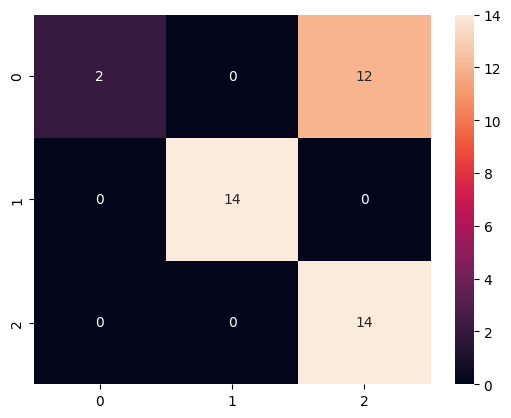

In [ ]:
# default params
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_ada_boost['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  abc = AdaBoostClassifier(n_estimators=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing learning rates

learning_rates = param_grid_ada_boost['learning_rate']
results_n = []
scr = []
for c in learning_rates:
  abc = AdaBoostClassifier(learning_rate=c)
  scores = cross_val_score(abc, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'learning_rate'])
fig = px.box(scored_df, x = 'learning_rate', y="score", title='learning_rate scores')
fig.show()

Najlepsze wartości hiperparametrów: {'learning_rate': 0.7, 'n_estimators': 150}
z uzyskanym wynikiem: 0.9046251601324066
Wyniki na zbiorze testowym:

Accuracy: 0.9523809523809523
f1 score: 0.9521367521367522


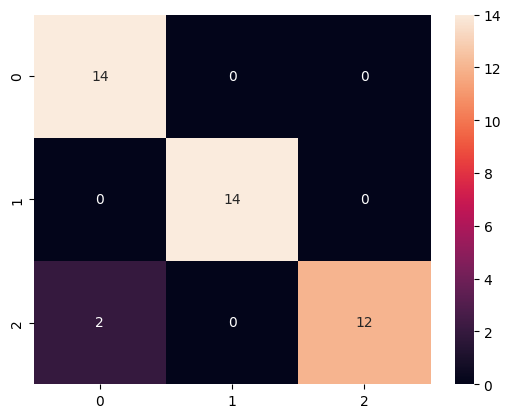

In [ ]:
# GridSearch

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid_ada_boost, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów: {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## Bagging

Accuracy: 0.9761904761904762
f1 score: 0.9761600681140911


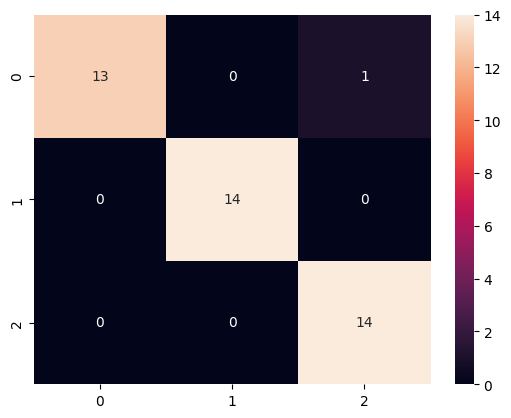

In [ ]:
# default params
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_bagging['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  bag = BaggingClassifier(n_estimators=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimatorsscores scores')
fig.show()

In [ ]:
# testing max_samples

max_samples = param_grid_bagging['max_samples']
results_n = []
scr = []
for c in max_samples:
  bag = BaggingClassifier(max_samples=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_samples'])
fig = px.box(scored_df, x = 'max_samples', y="score", title='max_samples scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_bagging['max_features']
results_n = []
scr = []
for c in max_features:
  bag = BaggingClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing bootstrap

bootstrap = param_grid_bagging['bootstrap']
results_n = []
scr = []
for c in bootstrap:
  bag = BaggingClassifier(bootstrap=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'bootstrap'])
fig = px.box(scored_df, x = 'bootstrap', y="score", title='bootstrap scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'bootstrap': False, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 70}
z uzyskanym wynikiem: 0.9107254276361829
Wyniki na zbiorze testowym:

Accuracy: 0.9761904761904762
f1 score: 0.9761600681140911


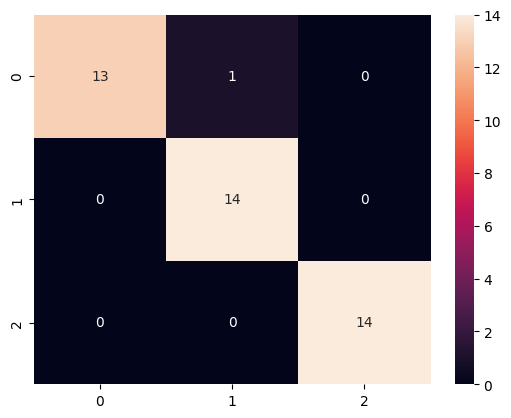

In [ ]:
# GridSearch

grid_search = GridSearchCV(BaggingClassifier(), param_grid_bagging, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

## RandomForest

Accuracy: 0.9761904761904762
f1 score: 0.9761600681140911


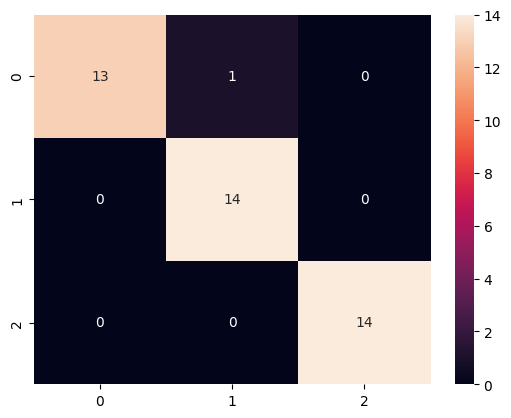

In [ ]:
# default params
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# testing n_estimators

n_estimators = param_grid_rand_forest['n_estimators']
results_n = []
scr = []
for c in n_estimators:
  forest = RandomForestClassifier(n_estimators=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'n_estimators'])
fig = px.box(scored_df, x = 'n_estimators', y="score", title='n_estimators scores')
fig.show()

In [ ]:
# testing max_depth

max_depth = param_grid_rand_forest['max_depth']
results_n = []
scr = []
for c in max_depth:
  forest = RandomForestClassifier(max_depth=c)
  scores = cross_val_score(forest, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, str(c)])

scored_df = pd.DataFrame(scr, columns=['score', 'max_depth'])
fig = px.box(scored_df, x = 'max_depth', y="score", title='max_depth scores')
fig.show()

In [ ]:
# testing max_features

max_features = param_grid_rand_forest['max_features']
results_n = []
scr = []
for c in max_features:
  forest = RandomForestClassifier(max_features=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'max_features'])
fig = px.box(scored_df, x = 'max_features', y="score", title='max_features scores')
fig.show()

In [ ]:
# testing min_samples_split

min_samples_split = param_grid_rand_forest['min_samples_split']
results_n = []
scr = []
for c in min_samples_split:
  forest = RandomForestClassifier(min_samples_split=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_split'])
fig = px.box(scored_df, x = 'min_samples_split', y="score", title='min_samples_split scores')
fig.show()

In [ ]:
# testing min_samples_leaf

min_samples_leaf = param_grid_rand_forest['min_samples_leaf']
results_n = []
scr = []
for c in min_samples_leaf:
  forest = RandomForestClassifier(min_samples_leaf=c)
  scores = cross_val_score(bag, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_leaf'])
fig = px.box(scored_df, x = 'min_samples_leaf', y="score", title='min_samples_leaf scores')
fig.show()

Najlepsze wartości hiperparametrów:
 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
z uzyskanym wynikiem: 0.9094845476584605
Wyniki na zbiorze testowym:

Accuracy: 1.0
f1 score: 1.0


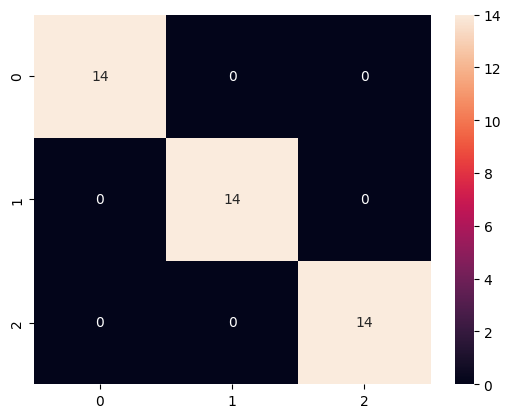

In [ ]:
# GridSearch

grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rand_forest, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

print(f'Najlepsze wartości hiperparametrów:\n {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)